## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/KelvynAmaral/jornada_pandas/refs/heads/main/datasets/alunos_salvos.csv'

dados = pd.read_csv(url)

In [2]:
dados.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [3]:
dados.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [4]:
dados.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

In [5]:
dados.shape

(18, 4)

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


In [7]:
dados['Nome']

0           Ary
1           Ana
2         Cátia
3         Denis
4          Beto
5         Bruna
6          Dara
7        Carlos
8         Alice
9         Vitor
10       Daniel
11         Igor
12    Sthefanie
13        Mirla
14        Paulo
15       Mylena
16        Lucas
17        Nadia
Name: Nome, dtype: object

In [8]:
dados[['Notas', 'Idade']]

,Notas,Idade
0,7.5,20
1,NaN,18
2,2.5,27
3,5.0,18
4,10.0,21
5,NaN,23
6,7.0,21
7,6.0,19
8,5.6,35
9,NaN,28


In [9]:
dados['Aprovado']

0      True
1     False
2     False
3     False
4      True
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12     True
13     True
14    False
15     True
16    False
17     True
Name: Aprovado, dtype: bool

### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

In [10]:
dados.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [11]:
import pandas as pd

In [12]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/KelvynAmaral/jornada_pandas/refs/heads/main/datasets/Imobiliaria.csv'
dados = pd.read_csv(url, sep=',')

In [13]:
dados.head(2)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN


In [14]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']
                      
# removendo imóveis comerciais
df = dados.query('Tipo not in @imoveis_comerciais')


In [15]:
df.head(2)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN


In [16]:
df_apartamentos = dados.query('Tipo == "Apartamento"')

### Desafio 1
Calcular a média de quartos por apartamento

In [17]:
print('A media de quartos por apartamento é:', df_apartamentos['Quartos'].mean().round(2))

A media de quartos por apartamento é: 2.48


### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [18]:
print('Quantidade de bairros unicos:', df['Bairro'].nunique())

Quantidade de bairros unicos: 154


In [19]:
print('Bairros unicos:', df['Bairro'].unique())

Bairros unicos: ['Copacabana' 'Jardim Botânico' 'Centro' 'Higienópolis' 'Vista Alegre'
 'Cachambi' 'Barra da Tijuca' 'Ramos' 'Grajaú' 'Lins de Vasconcelos'
 'Botafogo' 'Taquara' 'Freguesia (Jacarepaguá)' 'Tijuca' 'Olaria' 'Leblon'
 'Ipanema' 'Campo Grande' 'Recreio dos Bandeirantes' 'Jardim Oceânico'
 'Humaitá' 'Península' 'Méier' 'Vargem Pequena' 'Maracanã' 'Jacarepaguá'
 'São Conrado' 'Vila Valqueire' 'Gávea' 'Cosme Velho' 'Bonsucesso'
 'Todos os Santos' 'Laranjeiras' 'Itanhangá' 'Flamengo' 'Praça Seca'
 'Piedade' 'Lagoa' 'Catete' 'Jardim Carioca' 'Benfica' 'Glória'
 'Vila Isabel' 'Rocha Miranda' 'Engenho Novo' 'Engenho de Dentro'
 'Cidade Nova' 'Pilares' 'Arpoador' 'Tomás Coelho' 'Água Santa'
 'São Cristóvão' 'Ilha do Governador' 'Jardim Sulacap' 'Oswaldo Cruz'
 'Vila da Penha' 'Anil' 'Vargem Grande' 'Tanque' 'Vaz Lobo' 'Madureira'
 'São Francisco Xavier' 'Pechincha' 'Leme' 'Irajá' 'Quintino Bocaiúva'
 'Urca' 'Penha' 'Gardênia Azul' 'Rio Comprido' 'Andaraí' 'Santa Teresa'
 'Inhaúma'

### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [20]:
print('Média de valor de aluguel mais elevadas por',
      df.groupby('Bairro')['Valor'].mean().round(2).sort_values(ascending=False).head(5))

Média de valor de aluguel mais elevadas por Bairro
Joá              16773.48
Cidade Jardim    12000.00
Arpoador         10896.06
Paquetá          10550.00
Ipanema           9196.12
Name: Valor, dtype: float64


### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

In [21]:
media_aluguel_elevado = df.groupby('Bairro')['Valor'].mean().round(2).sort_values(ascending=False)

<Axes: xlabel='Bairro'>

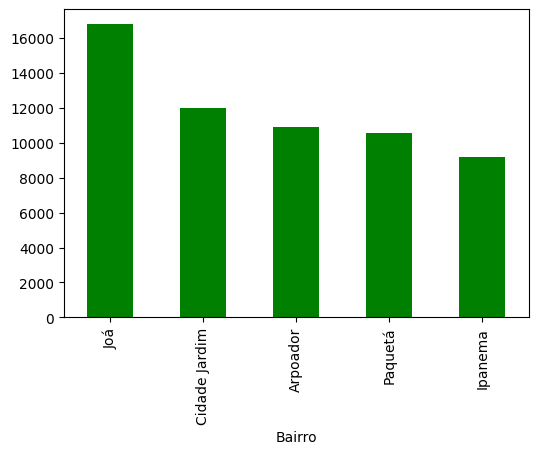

In [22]:
media_aluguel_elevado.head(5).plot(kind='bar', figsize=(6,4), color='green')

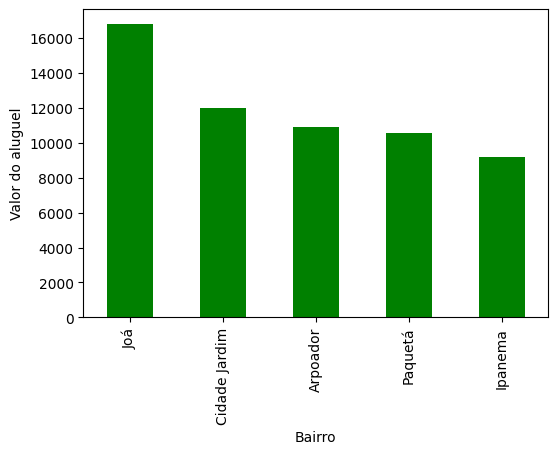

In [23]:
media_aluguel_elevado.head(5).plot(kind='bar', figsize=(6,4), color='green')
plt.xlabel('Bairro')
plt.ylabel('Valor do aluguel')
plt.title = 'Média de valor de aluguel mais elevadas por bairro'
plt.show()

## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [24]:
# Importando novamente os dados
url = 'https://raw.githubusercontent.com/KelvynAmaral/jornada_pandas/refs/heads/main/datasets/alunos_salvos.csv'

alunos = pd.read_csv(url, sep=',')


### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [25]:
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


In [26]:
alunos.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [27]:
alunos['Notas'] = alunos['Notas'].fillna(0)

In [28]:
alunos.isnull().sum()

Nome        0
Idade       0
Notas       0
Aprovado    0
dtype: int64

In [29]:
alunos.tail()

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,0.0,False
15,Mylena,29,7.0,True
16,Lucas,33,0.0,False
17,Nadia,34,8.0,True


### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [30]:
alunos_remover = alunos.query('Nome == "Alice" | Nome == "Carlos"').index

In [31]:
alunos.drop(alunos_remover, inplace=True)

In [32]:
alunos.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [33]:
alunos_aprovados = alunos.query('Aprovado == True')

In [34]:
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [35]:
#alunos_aprovados.to_csv('alunos_aprovados.csv', index=False)

### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [36]:
alunos_aprovados['Notas'] = alunos_aprovados['Notas'].replace(7.0, 8.0)

C:\Users\kelvyn.candido\AppData\Local\Temp\ipykernel_16328\174260029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_aprovados['Notas'] = alunos_aprovados['Notas'].replace(7.0, 8.0)


In [37]:
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [38]:
# Importando novamente os dados
url = 'https://raw.githubusercontent.com/KelvynAmaral/jornada_pandas/refs/heads/main/datasets/alunos_salvos.csv'

dados = pd.read_csv(url)

### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

In [39]:
dados['Notas'] = dados['Notas'].fillna(0)
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


In [40]:
dados['Pontos_extras'] = dados['Notas'] * 0.4
dados.round(2)

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.00
1,Ana,18,0.0,False,0.00
2,Cátia,27,2.5,False,1.00
3,Denis,18,5.0,False,2.00
4,Beto,21,10.0,True,4.00
5,Bruna,23,0.0,False,0.00
6,Dara,21,7.0,True,2.80
7,Carlos,19,6.0,True,2.40
8,Alice,35,5.6,False,2.24
9,Vitor,28,0.0,False,0.00


### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

In [41]:
dados['Notas_finais'] = dados['Notas'] + dados['Pontos_extras']
dados.head(2)

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0


### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [42]:
dados['Aprovado_final'] = dados['Notas_finais'] >= 6
dados.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras

In [43]:
dados.query('Aprovado == False & Aprovado_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
